In [1]:
# import correct packages

import pandas as pd
import json
import time
import statistics

In [2]:
# read the json file

df = pd.read_json('data.json',lines=True)

In [3]:
# initialize dictionaries that will track year and price

bedroom1_bathroom1 = {}
bedroom1_bathroom15 = {}
bedroom2_bathroom1 = {}
bedroom2_bathroom15 = {}
bedroom2_bathroom2 = {}
bedroom2_bathroom25 = {}
bedroom3_bathroom2 = {}
bedroom3_bathroom25 = {}
bedroom4 = {}
bedroom5 = {}

c = 0

In [4]:
# helper function that will be used to update dictionaries with rent prices 

def update_bedroom_dict(num_bed, curr_zip, update_dict):
    if num_bed == 1:
        if bathroom == 1.0:
            bedroom1_bathroom1[curr_zip] = update_dict
        if bathroom == 1.5:
            bedroom1_bathroom15[curr_zip] = update_dict
    if num_bed == 2:
        if bathroom == 1:
            bedroom2_bathroom1[curr_zip] = update_dict
        if bathroom == 1.0:
            bedroom2_bathroom1[curr_zip] = update_dict
        if bathroom == 1.5:
            bedroom2_bathroom15[curr_zip] = update_dict
        if bathroom == 2:
            bedroom2_bathroom2[curr_zip] = update_dict
        if bathroom == 2.0:
            bedroom2_bathroom2[curr_zip] = update_dict
        if bathroom == 2.5:
            bedroom2_bathroom25[curr_zip] = update_dict
    if num_bed == 3:
        if bathroom == 2:
            bedroom3_bathroom2[curr_zip] = update_dict
        if bathroom == 2.0:
            bedroom3_bathroom2[curr_zip] = update_dict
        if bathroom == 2.5:
            bedroom3_bathroom25[curr_zip] = update_dict
    if num_bed == 4:
        bedroom4[zpid] = new_dict
    if num_bed == 5:
        bedroom5[zpid] = new_dict

In [5]:
monthly_rent = []

for i in range(8):
    monthly_rent.append({'Jan':[], 'Feb':[], 'Mar':[], 'Apr':[], 'May':[], 'Jun':[], 'Jul':[], 'Aug':[], 'Sep':[], 'Oct':[], 'Nov':[],'Dec':[]})

In [6]:
type(monthly_rent[1])

dict

In [7]:
# iterate the data to populate the dictionaries for each bedroom and bathroom type
monthly_rent = []
for i in range(8):
    monthly_rent.append({'Jan':[], 'Feb':[], 'Mar':[], 'Apr':[], 'May':[], 'Jun':[], 'Jul':[], 'Aug':[], 'Sep':[], 'Oct':[], 'Nov':[],'Dec':[]})


for zpid in df['zpid'].tolist():
    homeValue = df.loc[df['zpid'] == zpid]['data'][c]['HomeValueChartData']
    
    try:
        bedroom = df.loc[df['zpid'] == zpid]['data'][c]['results']['result']['bedrooms']['$']
        bathroom = df.loc[df['zpid'] == zpid]['data'][c]['results']['result']['bathrooms']['$']
    except (TypeError,KeyError):
        c=c+1
        continue
    c = c + 1

    chart = json.loads(homeValue)
    y= {2010:[], 2011:[], 2012:[], 2013:[], 2014:[], 2015:[], 2016:[], 2017:[]}

    # append rent so that it can be averaged later
    # the key is the year from [-4:]
    for i in chart['points']:
        year = int(time.ctime(i['x']/1000)[-4:])
        month = time.ctime(i['x']/1000)[4:7]
        y[year].append(i['y'])
        if bedroom == 1 or bedroom == 2 or bedroom == 3:
            monthly_rent[year%10][month].append(i['y'])
            
    # new_dict will have key: year,  value: average rent price
    new_dict ={}
    for key, value in y.items():
        if (len(value) != 0):
            new_dict[key] = statistics.mean(value)
            
    update_bedroom_dict(bedroom, zpid, new_dict)

In [8]:
chart.keys()

dict_keys(['points', 'name', 'id', 'regionType'])

In [9]:
for i in range(8):
    for key, value in monthly_rent[i].items():
        if (len(value) != 0):
            monthly_rent[i][key] = statistics.mean(value)


In [10]:
for i in range(8):
    print(monthly_rent[i].values())

dict_values([[], [], [], [], [], [], [], [], 2797.649703757812, 2758.2647512377243, 2712.9294929006087, 2735.8978498985803])
dict_values([2656.476835699797, 2670.536064908722, 2689.2901419878294, 2688.099148073022, 2705.0994726166327, 2731.6253144016227, 2728.1511561866128, 2704.1483164300203, 2697.289817444219, 2678.824259634888, 2686.1348478701825, 2683.047221095335])
dict_values([2695.6792697768765, 2662.34677484787, 2666.8320486815414, 2684.59724137931, 2720.8338336713996, 2742.9243002028397, 2772.7088032454362, 2763.4478701825556, 2741.8521703853953, 2716.5568356997974, 2698.084543610548, 2669.526572008114])
dict_values([2683.4633671399592, 2697.10645030426, 2728.6094929006085, 2751.5015821501015, 2777.637809330629, 2778.9125354969574, 2816.885436105477, 2821.6418661257608, 2806.917322515213, 2823.5051521298174, 2812.5724137931034, 2789.4644219066936])
dict_values([2759.4923326572007, 2782.8168762677483, 2811.3433671399594, 2798.075050709939, 2794.1114807302233, 2806.912129817444,

## Rent Prices Over Time

The goal of this visual is to find the month that is most expensive relative to the year that it is in. This way we can make determine which month is the worst month to sign a lease. In our data, looking at the past 6 years, we plotted each rent price for each month seperated by year. From the visual you can estimate a trend that around June to August, rent prices were higher than other months relative to each year.

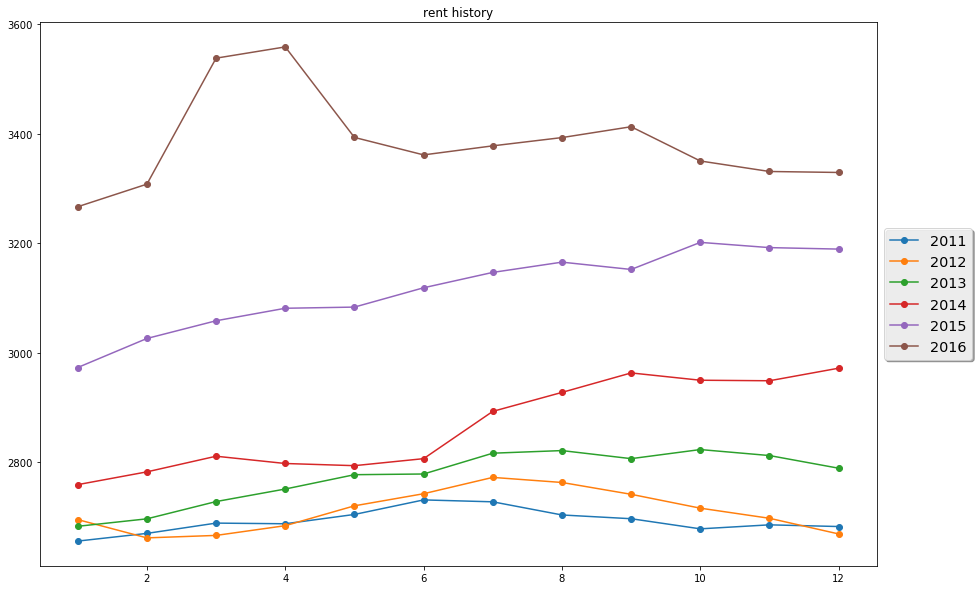

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(15, 10))
for i in range(1,7):
    ax.plot(range(1,13),list((monthly_rent[i]).values()), 'o-', label= (2010+i))
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), shadow=True, fontsize='x-large')
plt.title('rent history')

## Rent Price Over Time Cont.

In order to determine which month was the most expensive for the year, we had to adjust the data shown above. The monthly rent needs to be adjusted for the year because each year there is a distinct difference in average price. Therefore, the data visual below shows how far that month's rent was from the average rent price over the past 6 years. So, the farther the data point is from 0 the more standard deviations it is away from the mean. This shows that the months from June to December start to become more expensive times to rent in comparison to the months January to June.

In [12]:
plt.plot(range(1,13),month_rent_dev)

NameError: name 'month_rent_dev' is not defined

In [ ]:
# Note that the logic here is repeated for the other bedroom options below

print("Average rent: 1 bedroom 1 bathrooms\n")

# need to create a new dict that will be the one printed for result
# so that we don't modify the dictionary that we are iterating over 

rent_dict_1_monthly = {}

rent_dict_1 = {2010:[],2011:[],2012:[],2013:[],2014:[],2015:[],2016:[],2017:[]}
for key, value in bedroom1_bathroom1.items():
    for year, rent in value.items():
        rent_dict_1[year].append(rent)

        
# update the dictionary with same key but with value of averages     

for key, value in rent_dict_1.items():
    rent_dict_1[key] = statistics.mean(value)
    
    
print(rent_dict_1)
        
print("\nAverage rent: 1 bedroom 1.5 bathrooms\n")

rent_dict_15 = {2010:[],2011:[],2012:[],2013:[],2014:[],2015:[],2016:[],2017:[]}
for key, value in bedroom1_bathroom15.items():
    for year, rent in value.items():
        rent_dict_15[year].append(rent)
        
        
for key, value in rent_dict_15.items():
    rent_dict_15[key] = statistics.mean(value)
    
    
print(rent_dict_15)


In [ ]:
# if this is confusing check bedroom 1 layout for doc

print("Average rent: 2 bedroom 1 bathrooms\n")

rent_dict_21 = {2010:[],2011:[],2012:[],2013:[],2014:[],2015:[],2016:[],2017:[]}
for key, value in bedroom2_bathroom1.items():
    for year, rent in value.items():
        rent_dict_21[year].append(rent)
        
        
for key, value in rent_dict_21.items():
    rent_dict_21[key] = statistics.mean(value)
    
    
print(rent_dict_21)

print("\nAverage rent: 2 bedroom 1.5 bathrooms\n")

rent_dict_2 = {2010:[],2011:[],2012:[],2013:[],2014:[],2015:[],2016:[],2017:[]}
for key, value in bedroom2_bathroom15.items():
    for year, rent in value.items():
        rent_dict_2[year].append(rent)
        
        
for key, value in rent_dict_2.items():
    rent_dict_2[key] = statistics.mean(value)
    
    
print(rent_dict_2)

print("\nAverage rent: 2 bedroom 2 bathrooms\n")

rent_dict_22 = {2010:[],2011:[],2012:[],2013:[],2014:[],2015:[],2016:[],2017:[]}
for key, value in bedroom2_bathroom2.items():
    for year, rent in value.items():
        rent_dict_22[year].append(rent)
        
        
for key, value in rent_dict_22.items():
    rent_dict_22[key] = statistics.mean(value)
    
    
print(rent_dict_22)

print("\nAverage rent: 2 bedroom 2.5 bathrooms\n")

rent_dict_25 = {2010:[],2011:[],2012:[],2013:[],2014:[],2015:[],2016:[],2017:[]}
for key, value in bedroom2_bathroom25.items():
    for year, rent in value.items():
        rent_dict_25[year].append(rent)
        
        
for key, value in rent_dict_25.items():
    rent_dict_25[key] = statistics.mean(value)
    
    
print(rent_dict_25)

In [ ]:
# if this is confusing check bedroom 1 layout for doc

print("Average rent: 3 bedroom 2 bathrooms\n")

rent_dict_3 = {2010:[],2011:[],2012:[],2013:[],2014:[],2015:[],2016:[],2017:[]}
for key, value in bedroom3_bathroom2.items():
    for year, rent in value.items():
        rent_dict_3[year].append(rent)
        
        
for key, value in rent_dict_3.items():
    rent_dict_3[key] = statistics.mean(value)
    
    
print(rent_dict_3)

print("\nAverage rent: 3 bedroom 2.5 bathrooms\n")

rent_dict_35 = {2010:[],2011:[],2012:[],2013:[],2014:[],2015:[],2016:[],2017:[]}
for key, value in bedroom3_bathroom25.items():
    for year, rent in value.items():
        rent_dict_35[year].append(rent)
        
        
for key, value in rent_dict_35.items():
    rent_dict_35[key] = statistics.mean(value)
    
    
print(rent_dict_35)

In [ ]:
# if this is confusing check bedroom 1 layout for doc

print("Average rent: 4 bedroom\n")

rent_dict_4 = {2010:[],2011:[],2012:[],2013:[],2014:[],2015:[],2016:[],2017:[]}
for key, value in bedroom4.items():
    for year, rent in value.items():
        rent_dict_4[year].append(rent)
        
        
for key, value in rent_dict_4.items():
    rent_dict_4[key] = statistics.mean(value)
    
    
print(rent_dict_4)

print("\nAverage rent: 5 bedroom\n")

rent_dict_5 = {2010:[],2011:[],2012:[],2013:[],2014:[],2015:[],2016:[],2017:[]}
for key, value in bedroom5.items():
    for year, rent in value.items():
        rent_dict_5[year].append(rent)
        
        
for key, value in rent_dict_5.items():
    rent_dict_5[key] = statistics.mean(value)
    
    
print(rent_dict_5)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(15, 10))
# ax.plot(list(rent_dict_5.keys()), list(rent_dict_5.values()), 'ro-', label='5 bedroom')
# ax.plot(list(rent_dict_4.keys()),list(rent_dict_4.values()), 'o-', label='4 bedroom')
ax.plot(list(rent_dict_35.keys()),list(rent_dict_35.values()), 'ro-', label='3 bedroom 2.5 bathrooms')
ax.plot(list(rent_dict_3.keys()),list(rent_dict_3.values()), 'o-', label='3 bedroom 2 bathrooms')
ax.plot(list(rent_dict_25.keys()),list(rent_dict_25.values()), 'o-', label='2 bedroom 2.5 bathrooms')
ax.plot(list(rent_dict_22.keys()),list(rent_dict_22.values()), 'o-', label='2 bedroom 2 bathrooms')
ax.plot(list(rent_dict_2.keys()),list(rent_dict_2.values()), 'o-', label='2 bedroom 1.5 bathrooms')
ax.plot(list(rent_dict_21.keys()),list(rent_dict_21.values()), 'o-', label='2 bedroom 1 bathrooms')
ax.plot(list(rent_dict_15.keys()),list(rent_dict_15.values()), 'o-', label='1 bedroom 1.5 bathrooms')
ax.plot(list(rent_dict_1.keys()),list(rent_dict_1.values()), 'o-', label='1 bedroom 1 bathrooms')
legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), shadow=True, fontsize='x-large')
plt.title('rent history')
plt.xlabel('Year')
plt.ylabel('Rent')
plt.grid(True)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)

In [ ]:
fig, ag = plt.subplots(figsize=(15, 10))
ag.plot(list(rent_dict_5.keys()), list(rent_dict_5.values()), 'ro-', label='5 bedroom')
ag.plot(list(rent_dict_4.keys()),list(rent_dict_4.values()), 'o-', label='4 bedroom')
legend = ag.legend(loc='center left', bbox_to_anchor=(1, 0.5), shadow=True, fontsize='x-large')
plt.title('rent history')
plt.xlabel('Year')
plt.ylabel('Rent')
plt.grid(True)

for item in ([ag.title, ag.xaxis.label, ag.yaxis.label] +
             ag.get_xticklabels() + ag.get_yticklabels()):
    item.set_fontsize(15)